[245 245 245 245 245 245 245 246 246 246 246 246 246 246 246 246 246 246
 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246
 246 246 246 246 246 246 246 246 246 246 246 246 247 247 247 247 247 246
 246 246 246 246 246 246 246 247 247 247 246 246 246 246 246 247 247 247
 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 247 247
 247 247 247 247 247 247 248 248 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 248 248 247 247 247 247 246 246 247 247 248 248
 248 248 248 248 248 247 247 247 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 248 248 248 248 248 248 249 249 249 248 248 248
 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248 248
 248 248 248 248 248 248 247 247 247 248 248 248 24

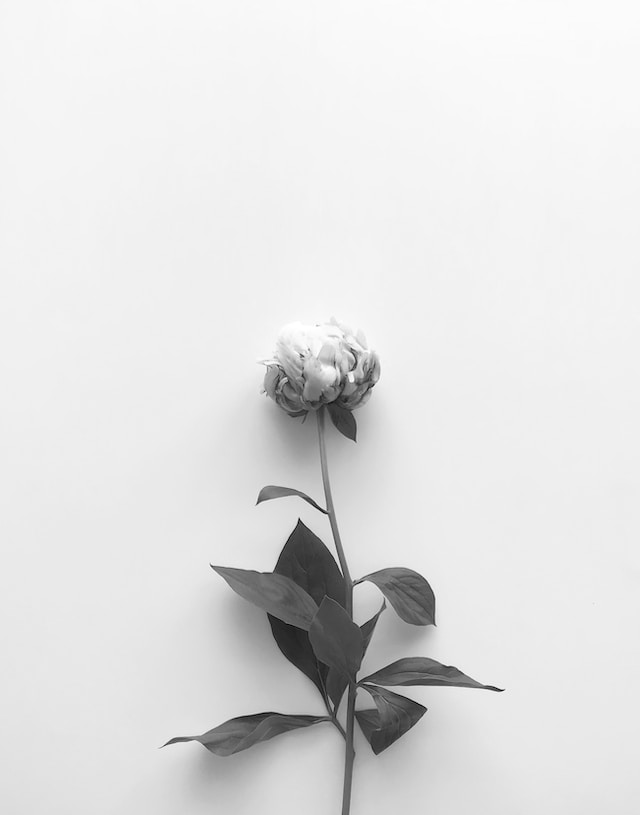

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/flower1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a threshold to split regions
threshold = 128

def region_split(image, threshold):
    if np.mean(image) > threshold:
        return [image]
    else:
        h, w = image.shape
        half_h, half_w = h // 2, w // 2
        subimages = [image[:half_h, :half_w], image[:half_h, half_w:],
                     image[half_h:, :half_w], image[half_h:, half_w:]]
        regions = []
        for subimage in subimages:
            regions.extend(region_split(subimage, threshold))
        return regions

regions = region_split(image, threshold)

# Display the regions
for i, region in enumerate(regions):
    print(region[i])
    cv2_imshow(region)

cv2.waitKey(0)
cv2.destroyAllWindows()


Grown Region


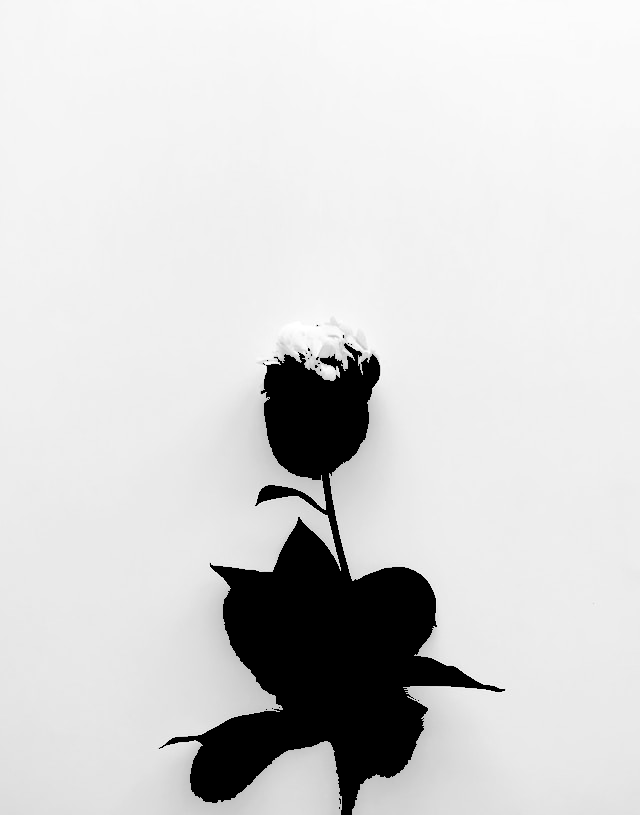

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/flower1.jpg', cv2.IMREAD_GRAYSCALE)

# Define seed point coordinates
seed_x, seed_y = 100, 100

# Define a threshold for region growing
threshold = 50

# Function to perform region growing
def region_grow(image, seed, threshold):
    h, w = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)

    stack = [(seed[0], seed[1])]

    while stack:
        x, y = stack.pop()

        if visited[x, y] == 1:
            continue

        visited[x, y] = 1

        if abs(int(image[x, y]) - int(image[seed[0], seed[1]])) <= threshold:
            region[x, y] = image[x, y]

            if x > 0:
                stack.append((x - 1, y))
            if x < h - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < w - 1:
                stack.append((x, y + 1))

    return region

# Perform region growing from the seed point
grown_region = region_grow(image, (seed_x, seed_y), threshold)

# Display the grown region
print("Grown Region")
cv2_imshow(grown_region)

cv2.waitKey(0)
cv2.destroyAllWindows()
